## G4Bench benchmark results
Geant4 : v10.7.1 Sequencial-mode

In [1]:
import pandas
import json
import os

In [2]:
#data_dir = "./data/10.6.1/"
data_dir = "./data/10.7.1/"
cpu_list = os.listdir(data_dir)
cpu_list

['ryzen_trpro_3995wx',
 'xeon_gold_6240',
 'xeon_gold_6142',
 'xeon_gold_6148',
 'xeon_e5_2690']

In [3]:
ecal_df = pandas.DataFrame(columns = ['CPU', 'Time', 'Init', 'TPE', 'EPS', 'SPS', 'Edep'])
hcal_df = pandas.DataFrame(columns = ['CPU', 'Time', 'Init', 'TPE', 'EPS', 'SPS', 'Edep'])
vgeo_x18_df = pandas.DataFrame(columns = ['CPU', 'Time', 'Init', 'TPE', 'EPS', 'SPS', 'Edep'])
vgeo_e20_df = pandas.DataFrame(columns = ['CPU', 'Time', 'Init', 'TPE', 'EPS', 'SPS', 'Edep'])

### ecal e1000 benchmark

In [4]:
idata = 0
for cpu in cpu_list:
    json_file = open(data_dir + cpu + "/ecal.json", 'r')
    jobj = json.load(json_file)
    ecal_df.loc[idata] = [jobj['cpu'], jobj['time'], jobj['init'], jobj['tpe'], jobj['eps'], jobj['sps'],jobj['edep']]
    idata = idata + 1

In [5]:
ecal_df_sorted = ecal_df.sort_values('SPS')
ecal_df_sorted.reset_index(drop=True, inplace=True)
ecal_df_sorted

,CPU,Time,Init,TPE,EPS,SPS,Edep
0,Intel(R) Xeon(R) CPU E5-2690 v4 @ 2.60GHz,70.96,1.57,7.096,0.144113,626.599,967.048
1,Intel(R) Xeon(R) Gold 6142 CPU @ 2.60GHz,62.50,1.19,6.250,0.163106,709.178,967.048
2,Intel(R) Xeon(R) Gold 6148 CPU @ 2.40GHz,61.24,1.63,6.124,0.167757,729.403,967.048
3,Intel(R) Xeon(R) Gold 6240 CPU @ 2.60GHz,56.48,1.26,5.648,0.181094,787.391,967.048
4,AMD Ryzen Threadripper PRO 3995WX 64-Cores,54.50,0.99,5.450,0.186881,812.553,967.048


In [6]:
import matplotlib.pyplot as plt

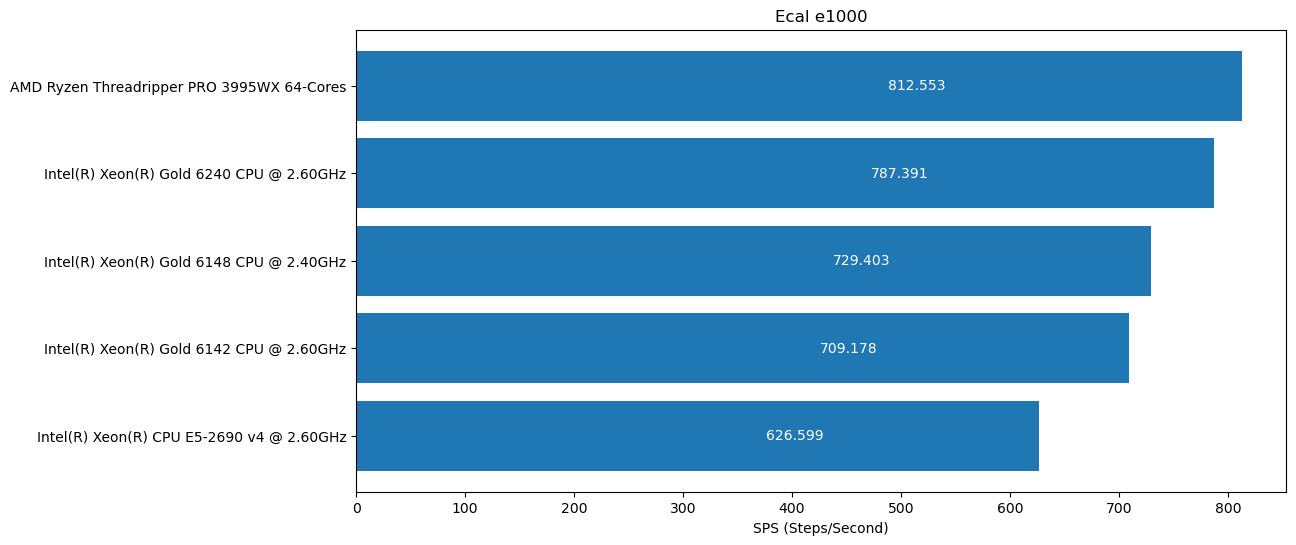

In [7]:
plt.rcdefaults()
fig, ecal_plot = plt.subplots(figsize=(12,6))
ecal_plot.barh(ecal_df_sorted['CPU'], ecal_df_sorted['SPS'], align='center')
ecal_plot.set_title('Ecal e1000')
ecal_plot.set_xlabel('SPS (Steps/Second)')
nplots = len(ecal_df_sorted)
for iy in range(0,nplots) :
  xpos = ecal_df_sorted['SPS'][iy] * 0.6
  plt.text(xpos, iy, ecal_df_sorted['SPS'][iy], verticalalignment='center', color='white')
plt.show()

### hcal p10 benchmark

In [8]:
idata = 0
for cpu in cpu_list:
    json_file = open(data_dir + cpu + "/hcal.json", 'r')
    jobj = json.load(json_file)
    hcal_df.loc[idata] = [jobj['cpu'], jobj['time'], jobj['init'], jobj['tpe'], jobj['eps'], jobj['sps'],jobj['edep']]
    idata = idata + 1

In [9]:
hcal_df_sorted = hcal_df.sort_values('SPS')
hcal_df_sorted.reset_index(drop=True, inplace=True)
hcal_df_sorted

,CPU,Time,Init,TPE,EPS,SPS,Edep
0,Intel(R) Xeon(R) CPU E5-2690 v4 @ 2.60GHz,403.04,1.59,40.304,0.024910,382.688,844.723
1,Intel(R) Xeon(R) Gold 6142 CPU @ 2.60GHz,361.23,1.32,36.123,0.027785,426.857,844.723
2,Intel(R) Xeon(R) Gold 6148 CPU @ 2.40GHz,342.04,1.61,34.204,0.029375,451.282,844.723
3,Intel(R) Xeon(R) Gold 6240 CPU @ 2.60GHz,323.32,1.30,32.332,0.031054,477.082,844.723
4,AMD Ryzen Threadripper PRO 3995WX 64-Cores,317.12,1.10,31.712,0.031644,486.140,844.723


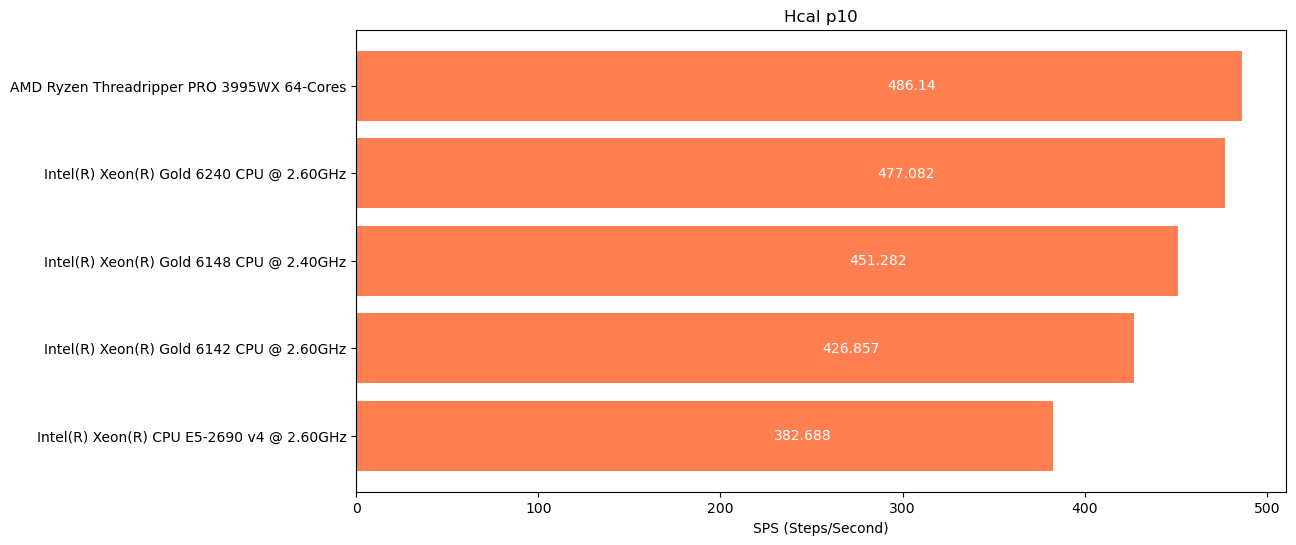

In [11]:
plt.rcdefaults()
fig, hcal_plot = plt.subplots(figsize=(12,6))
hcal_plot.barh(hcal_df_sorted['CPU'], hcal_df_sorted['SPS'], align='center', color='coral')
hcal_plot.set_title('Hcal p10')
hcal_plot.set_xlabel('SPS (Steps/Second)')
nplots = len(hcal_df_sorted)
for iy in range(0,nplots) :
  xpos = hcal_df_sorted['SPS'][iy] * 0.6
  plt.text(xpos, iy, hcal_df_sorted['SPS'][iy], verticalalignment='center', color='white')
plt.show()

### vgeo x18 benchmark

In [12]:
idata = 0
for cpu in cpu_list:
    json_file = open(data_dir + cpu + "/vgeo_x18.json", 'r')
    jobj = json.load(json_file)
    vgeo_x18_df.loc[idata] = [jobj['cpu'], jobj['time'], jobj['init'], jobj['tpe'], jobj['eps'], jobj['sps'],jobj['edep']]
    idata = idata + 1

In [13]:
vgeo_x18_df_sorted = vgeo_x18_df.sort_values('SPS')
vgeo_x18_df_sorted.reset_index(drop=True, inplace=True)
vgeo_x18_df_sorted

,CPU,Time,Init,TPE,EPS,SPS,Edep
0,Intel(R) Xeon(R) Gold 6142 CPU @ 2.60GHz,22.20,0.54,0.2220,4.61681,953.441,1.91229
1,Intel(R) Xeon(R) CPU E5-2690 v4 @ 2.60GHz,22.13,0.52,0.2213,4.62749,955.647,1.91229
2,Intel(R) Xeon(R) Gold 6148 CPU @ 2.40GHz,20.30,0.50,0.2030,5.05051,1043.010,1.91229
3,Intel(R) Xeon(R) Gold 6240 CPU @ 2.60GHz,19.02,0.48,0.1902,5.39374,1113.890,1.91229
4,AMD Ryzen Threadripper PRO 3995WX 64-Cores,17.88,0.42,0.1788,5.72738,1182.790,1.91229


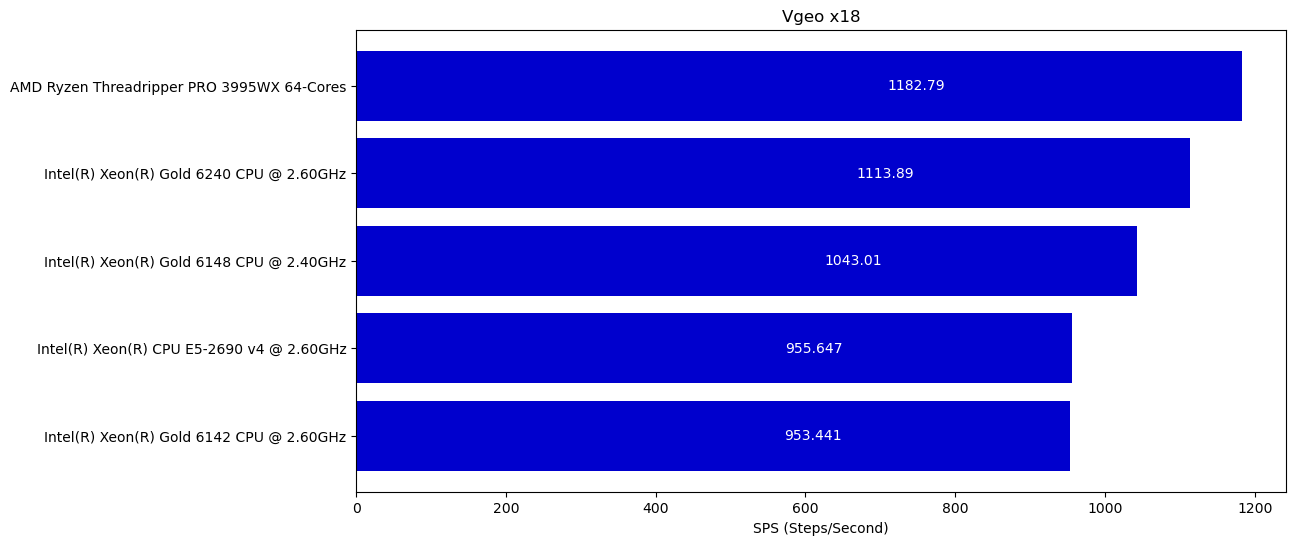

In [14]:
plt.rcdefaults()
fig, x18_plot = plt.subplots(figsize=(12,6))
x18_plot.barh(vgeo_x18_df_sorted['CPU'], vgeo_x18_df_sorted['SPS'], align='center', color='mediumblue')
x18_plot.set_title('Vgeo x18')
x18_plot.set_xlabel('SPS (Steps/Second)')
nplots = len(vgeo_x18_df_sorted)
for iy in range(0,nplots) :
  xpos = vgeo_x18_df_sorted['SPS'][iy] * 0.6
  plt.text(xpos, iy, vgeo_x18_df_sorted['SPS'][iy], verticalalignment='center', color='white')
plt.show()

### vgeo e20 benchmark

In [15]:
idata = 0
for cpu in cpu_list:
    json_file = open(data_dir + cpu + "/vgeo_e20.json", 'r')
    jobj = json.load(json_file)
    vgeo_e20_df.loc[idata] = [jobj['cpu'], jobj['time'], jobj['init'], jobj['tpe'], jobj['eps'], jobj['sps'],jobj['edep']]
    idata = idata + 1

In [16]:
vgeo_e20_df_sorted = vgeo_e20_df.sort_values('SPS')
vgeo_e20_df_sorted.reset_index(drop=True, inplace=True)
vgeo_e20_df_sorted

,CPU,Time,Init,TPE,EPS,SPS,Edep
0,Intel(R) Xeon(R) CPU E5-2690 v4 @ 2.60GHz,56.81,0.54,0.5681,1.77715,681.966,18.7446
1,Intel(R) Xeon(R) Gold 6142 CPU @ 2.60GHz,53.58,0.54,0.5358,1.88537,723.496,18.7446
2,Intel(R) Xeon(R) Gold 6148 CPU @ 2.40GHz,49.44,0.50,0.4944,2.04332,784.108,18.7446
3,Intel(R) Xeon(R) Gold 6240 CPU @ 2.60GHz,46.64,0.46,0.4664,2.16544,830.971,18.7446
4,AMD Ryzen Threadripper PRO 3995WX 64-Cores,43.27,0.42,0.4327,2.33372,895.548,18.7446


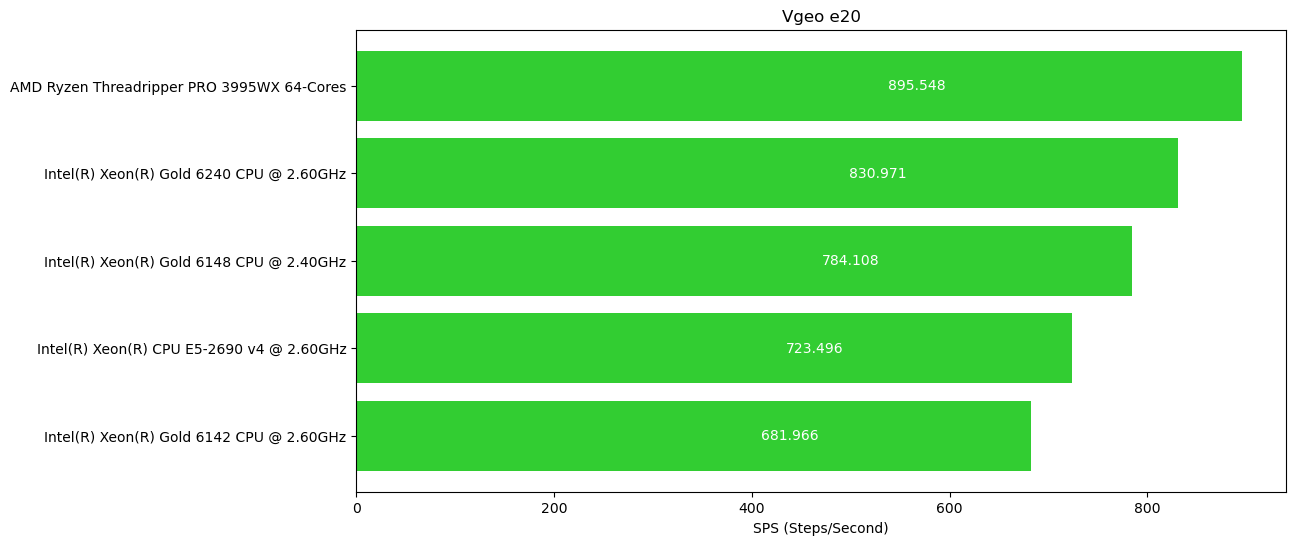

In [17]:
plt.rcdefaults()
fig, e20_plot = plt.subplots(figsize=(12,6))
e20_plot.barh(vgeo_x18_df_sorted['CPU'], vgeo_e20_df_sorted['SPS'], align='center', color='limegreen')
e20_plot.set_title('Vgeo e20')
e20_plot.set_xlabel('SPS (Steps/Second)')
nplots = len(vgeo_e20_df_sorted)
for iy in range(0,nplots) :
  xpos = vgeo_e20_df_sorted['SPS'][iy] * 0.6
  plt.text(xpos, iy, vgeo_e20_df_sorted['SPS'][iy], verticalalignment='center', color='white')
plt.show()